Добавляем нужные библиотеки

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from mlxtend.plotting import plot_decision_regions, plot_confusion_matrix
from sklearn.model_selection import train_test_split, cross_validate

Загружаем данные

In [2]:
df=pd.read_csv('train.csv', delimiter=";", encoding='utf-8', decimal=',')
df.head()

,C1,C2,C3,N1,N2,N3,N4,N5,N6,N7,...,N15,N16,N17,N18,N19,N20,N21,N22,N23,TARGET
0,3139363536333839,323531,33,83.74,3172.92,181.48,24.83,9.60,0.00,0.00,...,7,0,0,36,7,36,7,0,0,0
1,3437333830323633,343835,31,1.46,1273.88,92.11,211.78,28.98,5.75,13.85,...,18,5,6,52,12,57,18,0,0,0
2,3134323931353339,323531,33,0.00,31.95,763.19,48.13,77.22,9.33,4.90,...,24,18,6,46,18,64,24,0,0,0
3,3431333831343031,343433,31,117.49,529.19,1506.40,127.67,49.30,6.25,0.20,...,57,4,1,142,56,148,57,0,0,0
4,3233343933313234,343835,31,0.00,38.24,3493.18,389.98,72.78,16.72,4.28,...,28,17,5,69,23,86,28,0,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514009 entries, 0 to 514008
Data columns (total 27 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   C1      514009 non-null  int64  
 1   C2      514009 non-null  int64  
 2   C3      514009 non-null  int64  
 3   N1      514009 non-null  float64
 4   N2      514009 non-null  float64
 5   N3      514009 non-null  float64
 6   N4      514009 non-null  float64
 7   N5      514009 non-null  float64
 8   N6      514009 non-null  float64
 9   N7      514009 non-null  float64
 10  N8      514009 non-null  float64
 11  N9      514009 non-null  float64
 12  N10     514009 non-null  float64
 13  N11     514009 non-null  float64
 14  N12     514009 non-null  float64
 15  N13     514009 non-null  float64
 16  N14     514009 non-null  int64  
 17  N15     514009 non-null  int64  
 18  N16     514009 non-null  int64  
 19  N17     514009 non-null  int64  
 20  N18     514009 non-null  int64  
 21  N19     51

27 колонн, 3 категориальных признака (C1, C2, C3), 23 числовых признака (N1, …, N23) и целевая переменная — TARGET

514 009 строк

все признаки имеют числовые значения

отсутствующих значений нет

In [4]:
df.describe()

,C1,C2,C3,N1,N2,N3,N4,N5,N6,N7,...,N15,N16,N17,N18,N19,N20,N21,N22,N23,TARGET
count,5.140090e+05,514009.000000,514009.000000,514009.000000,514009.000000,514009.000000,514009.000000,514009.000000,514009.000000,514009.000000,...,514009.000000,514009.000000,514009.000000,514009.00000,514009.000000,514009.000000,514009.000000,514009.000000,514009.000000,514009.000000
mean,3.125269e+15,327890.745425,31.630411,44.571923,934.872724,2875.756859,108.307058,62.711117,12.868516,9.464795,...,29.079176,10.447070,7.747530,38.66520,21.243424,49.609273,29.059777,0.046978,0.019398,0.049307
std,8.589417e+14,51107.511245,0.929149,232.708320,2272.072942,4932.847144,197.771895,99.919667,19.511682,16.725490,...,31.241034,14.888752,11.964678,50.26614,24.155985,58.757945,31.233367,0.708441,0.349181,0.216507
min,3.530330e+05,3138.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.231393e+15,323531.000000,31.000000,0.000000,0.000000,0.000000,2.800000,9.580000,0.000000,0.220000,...,8.000000,0.000000,1.000000,2.00000,4.000000,4.000000,8.000000,0.000000,0.000000,0.000000
50%,3.337374e+15,343230.000000,31.000000,0.000000,77.460000,109.600000,45.000000,33.020000,4.970000,3.300000,...,20.000000,5.000000,4.000000,21.00000,14.000000,32.000000,20.000000,0.000000,0.000000,0.000000
75%,3.437364e+15,343636.000000,33.000000,0.560000,785.780000,4247.730000,132.020000,77.500000,18.350000,11.570000,...,40.000000,15.000000,10.000000,56.00000,30.000000,73.000000,40.000000,0.000000,0.000000,0.000000
max,3.536383e+15,353036.000000,33.000000,27971.110000,96905.370000,201234.910000,9197.630000,5192.670000,441.880000,999.780000,...,1258.000000,430.000000,499.000000,1109.00000,1024.000000,1346.000000,1258.000000,118.000000,99.000000,1.000000


Text(0, 0.5, 'Количество')

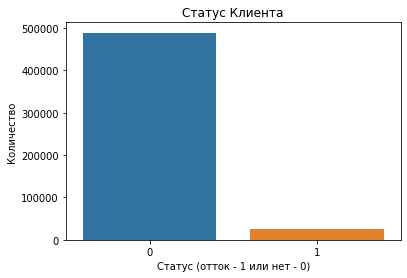

In [5]:
sns.countplot(df['TARGET'])
plt.title("Статус Клиента")
plt.xlabel("Статус (отток - 1 или нет - 0)")
plt.ylabel("Количество")

In [6]:
df['TARGET'].value_counts()

0    488665
1     25344
Name: TARGET, dtype: int64

In [7]:
print('Не отток', round(df['TARGET'].value_counts()[0]/len(df) * 100,2), '% всех клиентов')
print('Отток', round(df['TARGET'].value_counts()[1]/len(df) * 100,2), '% всех клиентов')
print('Не сбалансированная колонна TARGET')

Не отток 95.07 % всех клиентов
Отток 4.93 % всех клиентов
Не сбалансированная колонна TARGET


Категориальные признаки

In [8]:
print(df['C1'].value_counts().sort_values())

3534393232343231    1
3230393139323636    1
3431333133373333    1
3231353233373831    1
3433313134393234    1
                   ..
35303230373938      1
3531363337323936    1
3231303434323231    1
3331303938333438    1
3339363938303634    1
Name: C1, Length: 514009, dtype: int64


все данные не повторяются и категориальные, поэтому можно сказать, что эта колонна не дает никакой смысловой нагрузки и можно не использовать ее в модели

In [9]:
print(df['C2'].value_counts().sort_values(ascending=False))

343637    59659
343439    57656
343433    44158
343835    42649
343038    41280
          ...  
313433        2
343336        1
353031        1
3437          1
3330          1
Name: C2, Length: 64, dtype: int64


In [10]:
print(df['C3'].value_counts().sort_values(ascending=False))

31    351968
33    161996
32        45
Name: C3, dtype: int64


Переведем в отдельные 2 колонны с двоичной классификацией

In [11]:
df_C3 = pd.get_dummies(df['C3'], prefix='C3', drop_first=True)

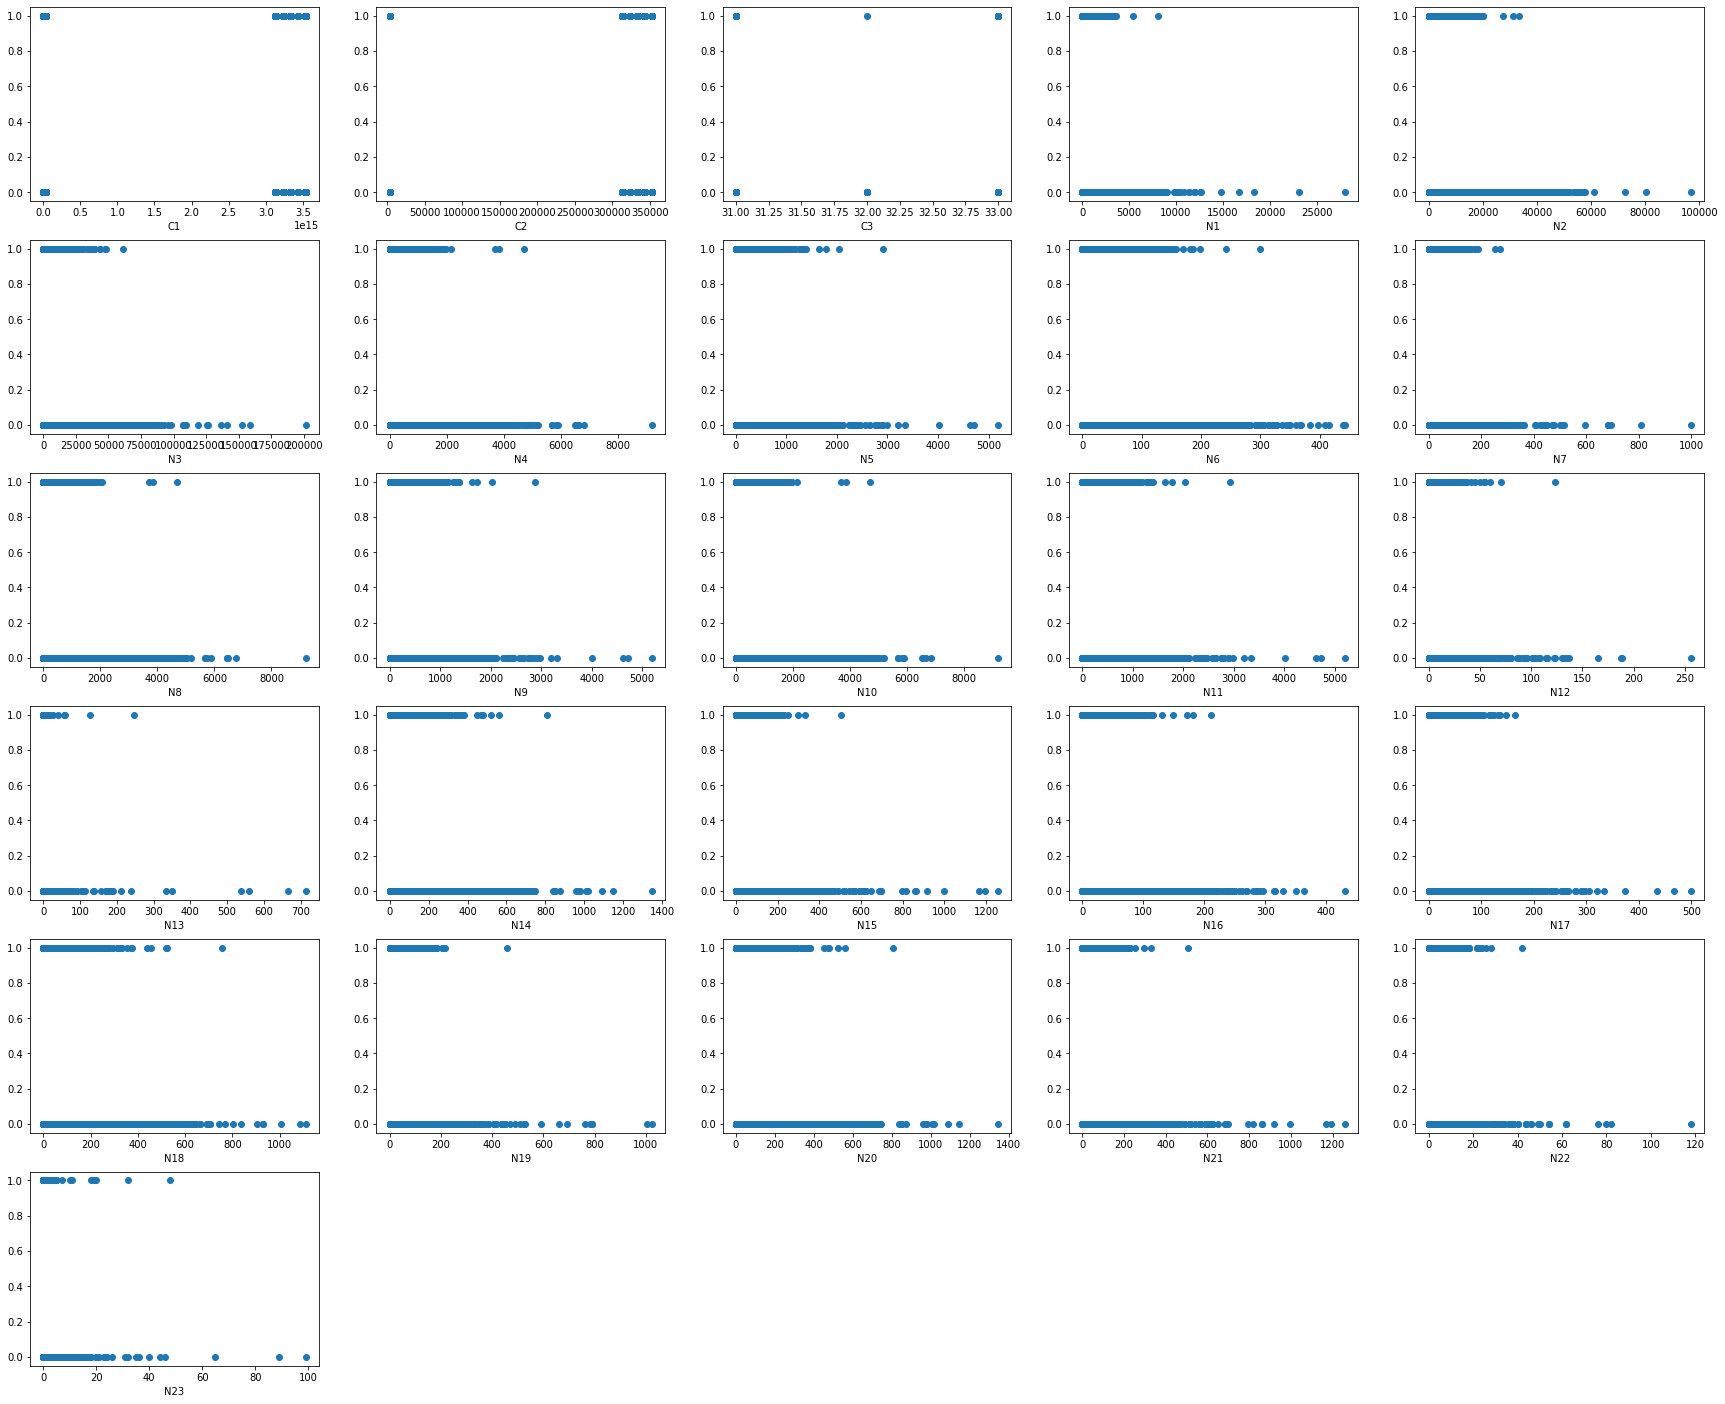

In [12]:
plt.figure(figsize=(30,25))

plotnumber=1
for column in df:
    if plotnumber<=26:
        ax=plt.subplot(6,5, plotnumber)
        plt.scatter(df[column], df['TARGET'])
        plt.xlabel(column, fontsize=10)
    plotnumber+=1

plt.show()

Можно заметить, что нет значительных различий в признаках для двух типов клиентов (отток, не отток)

Проверяем корреляцию признаков

<AxesSubplot:>

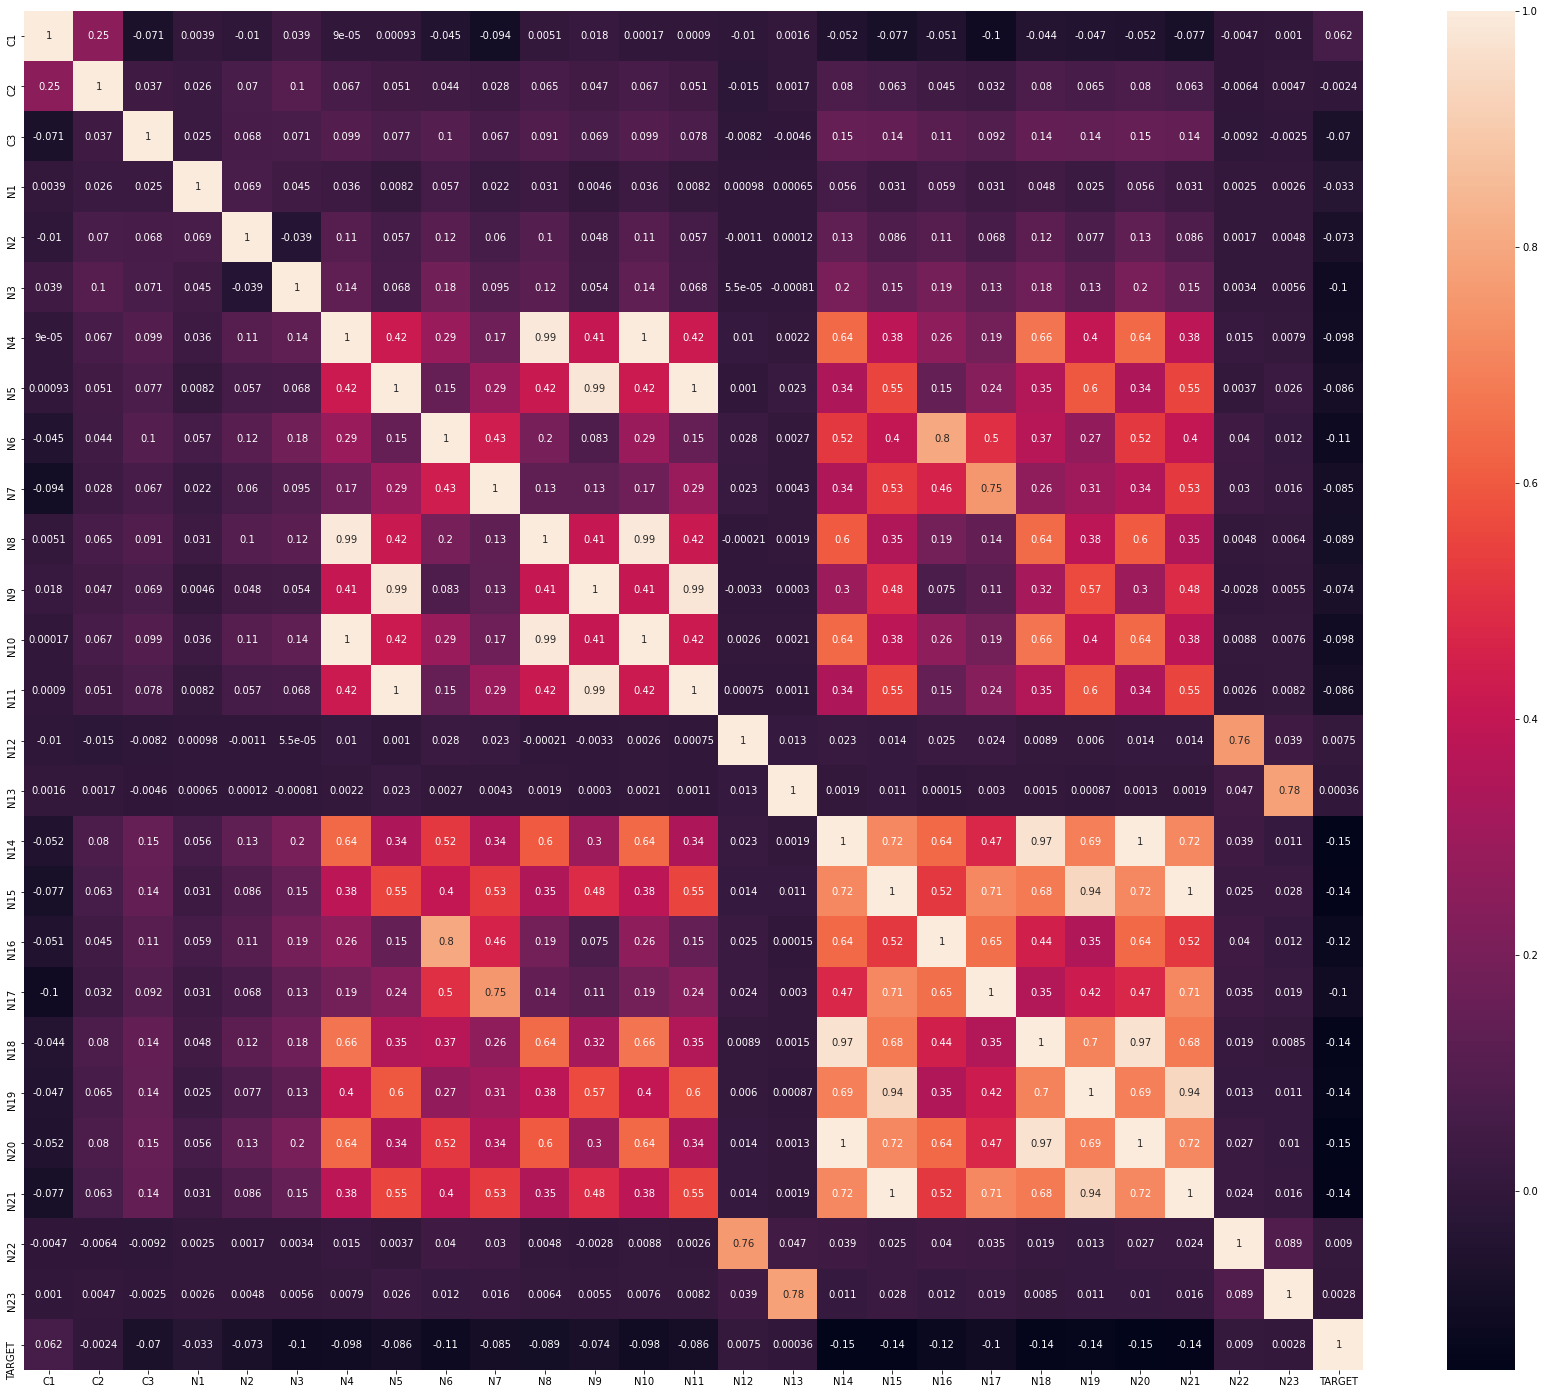

In [13]:
plt.figure(figsize=(30,25))
sns.heatmap(df.corr(), annot=True)

Можно заметить высокую корреляцию между различными параметрами. Так как параметры с высокой корреляцией имеют схожее влияние на поведение TARGET значений. Поэтому мы можем сократить кол-во параметров в модели, взяв один параметр из двух высоко коррелирующих.

X-независимые параметры

y-зависимый параметр

In [14]:
df=pd.concat([df,df_C3], axis=1)
df=df.drop(['C3'], axis=1)
df.head()

,C1,C2,N1,N2,N3,N4,N5,N6,N7,N8,...,N17,N18,N19,N20,N21,N22,N23,TARGET,C3_32,C3_33
0,3139363536333839,323531,83.74,3172.92,181.48,24.83,9.60,0.00,0.00,24.83,...,0,36,7,36,7,0,0,0,0,1
1,3437333830323633,343835,1.46,1273.88,92.11,211.78,28.98,5.75,13.85,206.03,...,6,52,12,57,18,0,0,0,0,0
2,3134323931353339,323531,0.00,31.95,763.19,48.13,77.22,9.33,4.90,38.80,...,6,46,18,64,24,0,0,0,0,1
3,3431333831343031,343433,117.49,529.19,1506.40,127.67,49.30,6.25,0.20,120.07,...,1,142,56,148,57,0,0,0,0,0
4,3233343933313234,343835,0.00,38.24,3493.18,389.98,72.78,16.72,4.28,373.27,...,5,69,23,86,28,0,0,0,0,0


In [15]:
X=df.drop(['TARGET', 'C1', 'N4', 'N5','N8', 'N9', 'N14', 'N15', 'N18', 'N19'], axis=1)
y=df['TARGET']

Делим данные на training и test в соотношении 75 на 25

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1, stratify=y)

In [18]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(385506, 18)
(128503, 18)
(385506,)
(128503,)


### Random Forest with Hyperparameter Tuning

In [19]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [20]:
from sklearn.ensemble import RandomForestClassifier

Используем коэффициенты влияния двух переменных в соотношении 5:95. Такой дисбаланс в данных.

In [21]:
params={
 "n_estimators"    : [int(x) for x in np.linspace(start=10, stop=200, num=10)],
 "max_features"        : ['auto', 'sqrt'],
 "max_depth" : [2,4],
 "min_samples_split"            : [2,5],
 "bootstrap" : [True, False], 
 "class_weight"  :[{0:5, 1:95}]
}

In [22]:
classifier=RandomForestClassifier()

Area Under ROC Curve для сравнения моделей. Так как imbalanced dataset, используем этот показатель.

In [23]:
random_search_rf=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [24]:
random_search_rf.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  3.0min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'class_weight': [{0: 5, 1: 95}],
                                        'max_depth': [2, 4],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [10, 31, 52, 73, 94,
                                                         115, 136, 157, 178,
                                                         200]},
                   scoring='roc_auc', verbose=3)

In [25]:
random_search_rf.best_estimator_

RandomForestClassifier(class_weight={0: 5, 1: 95}, max_depth=4,
                       max_features='sqrt', min_samples_split=5,
                       n_estimators=52)

In [26]:
random_search_rf.best_params_

{'n_estimators': 52,
 'min_samples_split': 5,
 'max_features': 'sqrt',
 'max_depth': 4,
 'class_weight': {0: 5, 1: 95},
 'bootstrap': True}

In [38]:
classifier_1=RandomForestClassifier(bootstrap=True, max_depth=4, max_features='sqrt',
                       min_samples_split=5, n_estimators=52, class_weight={0: 5, 1: 95})

In [39]:
classifier_1.fit(X_train,y_train)

RandomForestClassifier(class_weight={0: 5, 1: 95}, max_depth=4,
                       max_features='sqrt', min_samples_split=5,
                       n_estimators=52)

In [40]:
y_pred_1=classifier_1.predict(X_test)

In [41]:
from sklearn.metrics import confusion_matrix, classification_report

In [42]:
print(classification_report(y_pred_1, y_test))

              precision    recall  f1-score   support

           0       0.78      0.99      0.87     96243
           1       0.78      0.15      0.26     32260

    accuracy                           0.78    128503
   macro avg       0.78      0.57      0.56    128503
weighted avg       0.78      0.78      0.71    128503



(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

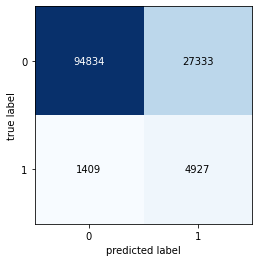

In [43]:
from mlxtend.plotting import plot_decision_regions, plot_confusion_matrix
plot_confusion_matrix(confusion_matrix(y_test, y_pred_1))

In [58]:
from sklearn.metrics import roc_auc_score

In [60]:
print(roc_auc_score(y_pred_1, y_test))

0.5690439052808561


### XGBoost with Hyperparameter Tuning

In [44]:
import xgboost

In [45]:
model = xgboost.XGBClassifier(scale_pos_weight=19)

In [46]:
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7, 1 ]
    
}

In [47]:
random_search_xgb=RandomizedSearchCV(model,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [48]:
random_search_xgb.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed: 17.6min finished


RandomizedSearchCV(cv=5, estimator=XGBClassifier(scale_pos_weight=19), n_iter=5,
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5, 0.7,
                                                             1],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7]},
                   scoring='roc_auc', verbose=3)

In [49]:
random_search_xgb.best_estimator_

XGBClassifier(colsample_bytree=0.7, gamma=0.0, learning_rate=0.2,
              min_child_weight=5, scale_pos_weight=19)

In [50]:
random_search_xgb.best_params_

{'min_child_weight': 5,
 'max_depth': 3,
 'learning_rate': 0.2,
 'gamma': 0.0,
 'colsample_bytree': 0.7}

In [51]:
xgb_1=xgboost.XGBClassifier(colsample_bytree=0.7, gamma=0.0, learning_rate=0.2, max_depth=3,
              min_child_weight=5, scale_pos_weight=19)

In [52]:
xgb_1.fit(X_train, y_train)

XGBClassifier(colsample_bytree=0.7, gamma=0.0, learning_rate=0.2,
              min_child_weight=5, scale_pos_weight=19)

In [53]:
y_pred_xgb=xgb_1.predict(X_test)

In [54]:
print(classification_report(y_pred_xgb, y_test))

              precision    recall  f1-score   support

           0       0.81      0.99      0.89    100692
           1       0.78      0.18      0.29     27811

    accuracy                           0.81    128503
   macro avg       0.80      0.58      0.59    128503
weighted avg       0.81      0.81      0.76    128503



(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

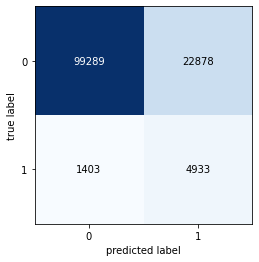

In [55]:
plot_confusion_matrix(confusion_matrix(y_test, y_pred_xgb))

In [61]:
print(roc_auc_score(y_test, y_pred_xgb))

0.7956493358145783
